# Convolutional Neural Network (CNN) for Determining Type of Trophy

In this notebook, we will build and train a Convolutional Neural Network (CNN) that will aim to classify pictures depending on whether they contain the Premier League trophy, or the Champions League trophy. 

## Overview of Data

For this project, I downloaded 500 images containing the Premier League trophy and 500 images containing the Champions League trophy. These images were downloaded from Google Images using a Google Chrome extension which allowed me to download all the images on my current webpage. I then manually went through these images to ensure every picture clearly showed the correct trophy. 

## Cleaning the Data

First we download the relevant libraries:

In [16]:
import numpy as np
import cv2
import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

We then create two lists containing either type of trophy through code that allows us access images through Python (code was sourced online):

In [17]:
from PIL import Image
import os, os.path

pl_trophy = []
path = "OneDrive\Documents\PL Trophy"
valid_images = [".jpg", ".jpeg"]
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    pl_trophy.append(Image.open(os.path.join(path,f)))
    
    
cl_trophy = []
path = "OneDrive\Documents\CL Trophy"
valid_images = [".jpg", ".jpeg"]
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    cl_trophy.append(Image.open(os.path.join(path,f)))

We ensure that both lists contain all 500 images:

In [73]:
print(len(pl_trophy))
print(len(cl_trophy))

500
500


We can view a sample of either trophy:

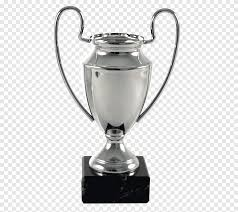

In [19]:
cl_trophy[238]

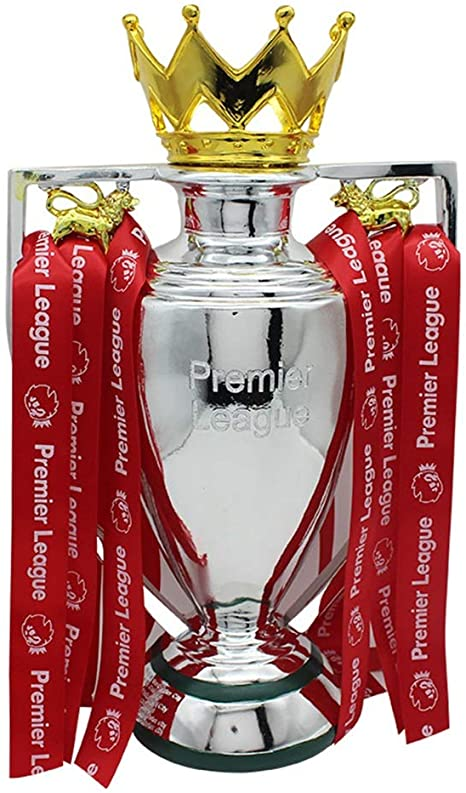

In [20]:
pl_trophy[102]

We convert every CL trophy to RGB format (initially some later code failed because one image was in RGBA format):

In [21]:
for i , pic in enumerate(cl_trophy):
    cl_trophy[i] = cl_trophy[i].convert('RGB')

We then resize every image to 64x64 pixels and view a couple more samples:

In [22]:
for i , pic in enumerate(pl_trophy):
    pl_trophy[i] = pic.resize((64,64))   

In [23]:
for i , pic in enumerate(cl_trophy):
    cl_trophy[i] = pic.resize((64,64))   

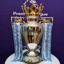

In [24]:
pl_trophy[248]

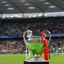

In [25]:
cl_trophy[202]

We then convert these images to arrays and convert the whole image list to an array:

In [27]:
for i , pic in enumerate(pl_trophy):
    pl_trophy[i] = img_to_array(pl_trophy[i])  

In [28]:
pl_trophy = np.array(pl_trophy)

In [29]:
for i , pic in enumerate(cl_trophy):
    cl_trophy[i] = img_to_array(cl_trophy[i])  

In [30]:
pl_trophy.shape

(500, 64, 64, 3)

In [31]:
cl_trophy = np.array(cl_trophy)

In [32]:
cl_trophy.shape

(500, 64, 64, 3)

We then split the data for both trophy datasets into training and testing datasets, and combine these to construct out x_train and x_test datasets:

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
pl_train, pl_test, cl_train, cl_test = train_test_split(pl_trophy, cl_trophy, test_size=0.2)

In [36]:
print(pl_train.shape)
print(cl_train.shape)
print(pl_test.shape)
print(cl_test.shape)

(400, 64, 64, 3)
(400, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)


In [37]:
x_train = np.concatenate((pl_train, cl_train))
x_test = np.concatenate((pl_test, cl_test))

In [38]:
print(x_train.shape)
print(x_test.shape)

(800, 64, 64, 3)
(200, 64, 64, 3)


We check that the images in the x_train dataset with index 399 and below contain the PL Trophy, and that images with index 400 and higher contain the CL trophy:

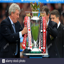

In [77]:
array_to_img(x_train[399])

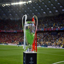

In [78]:
array_to_img(x_train[400])


Similarly, we can check that images in the  x_test data with index 99 and below contain the PL Trophy, and that images with index 100 and higher contain the CL trophy:

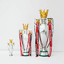

In [79]:
array_to_img(x_test[99])

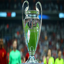

In [80]:
array_to_img(x_test[100])

We then create our y_train and y_test datasets by creating an array of ones in the length of the x_train and x_test datasets respectively, and fill the first half of these with zeros to represent the PL trophy images. We then encode these arrays so that they are in the correct form to build our CNN:

In [43]:
from tensorflow.keras.utils import to_categorical

y_train = np.ones(800, dtype = float)
y_train[:len(pl_train)] = 0 
y_train = to_categorical(y_train, 2)

In [44]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [45]:
y_test = np.ones(200, dtype = float)
y_test[:len(pl_test)] = 0 
y_test = to_categorical(y_test, 2)

In [46]:
print(y_test[97])
print(y_test[101])

[1. 0.]
[0. 1.]


We finally scale our x_train and x_test datasets so that they are between 0 and 1, by dividing by 255 (the maximum possible value of a pixel): 

In [47]:
x_train /= 255
x_test /= 255

## Building the Neural Network

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

### Simple CNN with RMSprop Optimiser 

We then build a simple CNN though the following steps:

In [49]:
#First we initialise our model using the Sequential function and name it model_1

model_1 = Sequential(name='model_1')

#We then add our first convolutional layer with a kernel size of 5x5, strides of 2x2, and 32 filters. 
#We use 'same' padding to surround the image with zeros so that the output has the same dimensions as the input
#We ensure that the input shape is the same shape as our images (64x64x3)
#We finally add the activation layer using the ReLU activation function

model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

#We then add another similar convolutional layer again with the ReLU activation function:

model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

#We can use MaxPooling to reduce the size of our layer using a pool size of 2x2
#We also add a dropout to add some extra regularisation

model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25)
                    
#We then flatten our object into a one-dimensional object
#We then add a Dense layer with ReLu activation and again add a dropout for some regularisation 
#We then add another Dense layer, this time with value 2 so that our output shape is the same as our number of classes
#We then use the softmax activation function so that we can retrieve the probabilities of each class     
            
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(2))
model_1.add(Activation('softmax'))

#We can finally view a summary of all the parameters at each stage
            
            
model_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        2432      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        25632     
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0   

We can see that this model has over 832k parameters

We then specify our batch size to be 32 and our optimiser to be RMSprop with a learning rate of 0.001, and fit the model using our x_train and y_train datasets with 15 epochs. We use our x_test and y_test datasets to generate our validation data, and finally ensure that our data is shuffled as we optimise the model. 

In [50]:
from tensorflow.keras.optimizers import RMSprop

batch_size = 32
opt = RMSprop(learning_rate=1e-3)

In [51]:
model_1.compile(loss = 'categorical_crossentropy',
                optimizer = opt, 
                metrics = ['accuracy'])

history_1 = model_1.fit(x_train, y_train,
              batch_size = batch_size,
              epochs = 15,
              validation_data = (x_test, y_test), 
              shuffle = True)

Epoch 1/15
25/25 [==============================] - 1s 44ms/step - loss: 0.7211 - accuracy: 0.5188 - val_loss: 0.6627 - val_accuracy: 0.6750
Epoch 2/15
25/25 [==============================] - 1s 43ms/step - loss: 0.6534 - accuracy: 0.6538 - val_loss: 0.6461 - val_accuracy: 0.5750
Epoch 3/15
25/25 [==============================] - 1s 44ms/step - loss: 0.5532 - accuracy: 0.7212 - val_loss: 0.4993 - val_accuracy: 0.8300
Epoch 4/15
25/25 [==============================] - 1s 39ms/step - loss: 0.4676 - accuracy: 0.7887 - val_loss: 0.5527 - val_accuracy: 0.7700
Epoch 5/15
25/25 [==============================] - 1s 44ms/step - loss: 0.3879 - accuracy: 0.8388 - val_loss: 0.3672 - val_accuracy: 0.8600
Epoch 6/15
25/25 [==============================] - 1s 44ms/step - loss: 0.3760 - accuracy: 0.8487 - val_loss: 0.3672 - val_accuracy: 0.8200
Epoch 7/15
25/25 [==============================] - 1s 45ms/step - loss: 0.3218 - accuracy: 0.8763 - val_loss: 0.3449 - val_accuracy: 0.8550
Epoch 8/15
25

We can see that the validation accuracy has reached a fairly high level of 0.885 by the 15th epoch.

We then create a function that will plot the training loss and validation loss against the number of epochs:

In [52]:
import matplotlib.pyplot as plt

def plot_loss(hist):
    
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(hist.history['loss'], 'r-', marker = '.', label = 'Train Loss')
    ax.plot(hist.history['val_loss'], 'b-', marker = '.', label = 'Validation Loss' )
    ax.legend(loc = 'best', facecolor='none', edgecolor='none')
    ax.set(xlabel = 'Number of Epochs',
           ylabel = 'Loss',
           title = 'Loss vs. Number of Epochs')

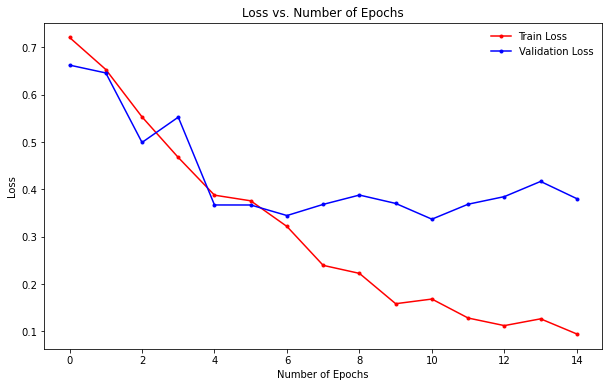

In [53]:
plot_loss(history_1)

We can see that while the training loss continued to decrease, the validation loss levelled out at around the sixth epoch.

### Deeper CNN with RMSprop Optimiser

We now create a more complicated CNN by adding an additional two convolutional layers and an additional one MaxPooling layer. We also reduce the strides to 1x1:

In [54]:
model_2 = Sequential(name='model_2')

model_2.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(Conv2D(32, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(2))
model_2.add(Activation('softmax'))

model_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 31, 31, 64)        1849

We can see that this model had over 6.4 million parameters, considerably more than the previous simpler model.

Similarly to before, we can then use the RMSprop optimiser and fit our model:

In [55]:
opt_2 = RMSprop(learning_rate = 1e-3)
 
# Let's train the model using RMSprop
model_2.compile(loss='categorical_crossentropy',
                optimizer=opt_2,
                metrics=['accuracy'])

In [56]:
history_2 = model_2.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=15,
                        validation_data=(x_test, y_test),
                        shuffle=True)

Epoch 1/15
25/25 [==============================] - 6s 242ms/step - loss: 1.1191 - accuracy: 0.5100 - val_loss: 0.6826 - val_accuracy: 0.5050
Epoch 2/15
25/25 [==============================] - 6s 237ms/step - loss: 0.6858 - accuracy: 0.5688 - val_loss: 0.6734 - val_accuracy: 0.5100
Epoch 3/15
25/25 [==============================] - 6s 237ms/step - loss: 0.6211 - accuracy: 0.6725 - val_loss: 0.4585 - val_accuracy: 0.8100
Epoch 4/15
25/25 [==============================] - 6s 240ms/step - loss: 0.5564 - accuracy: 0.7113 - val_loss: 0.3846 - val_accuracy: 0.8550
Epoch 5/15
25/25 [==============================] - 6s 236ms/step - loss: 0.4399 - accuracy: 0.8288 - val_loss: 0.5516 - val_accuracy: 0.7750
Epoch 6/15
25/25 [==============================] - 6s 237ms/step - loss: 0.3983 - accuracy: 0.8338 - val_loss: 0.3900 - val_accuracy: 0.8500
Epoch 7/15
25/25 [==============================] - 6s 237ms/step - loss: 0.3815 - accuracy: 0.8450 - val_loss: 0.3128 - val_accuracy: 0.8800
Epoch 

We can see that this model has reached an even higher validation accuracy which peaked at 0.925 after the 12th epoch, but took considerably longer to train. 

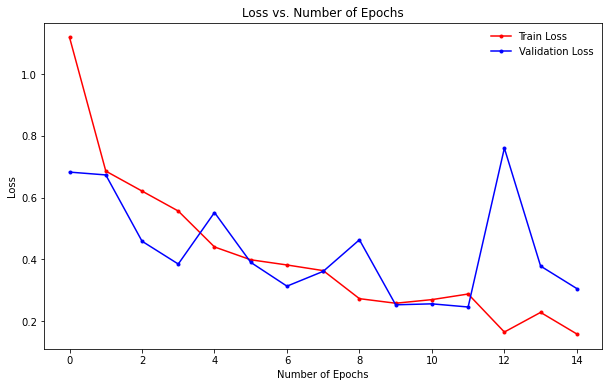

In [57]:
plot_loss(history_2)

### Deeper CNN with SGD Optimiser

We again create the same deeper CNN model but this time train it using the SGD optimiser:

In [58]:
model_3 = Sequential(name='model_3')

model_3.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_3.add(Activation('relu'))
model_3.add(Conv2D(32, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, (3, 3), padding='same'))
model_3.add(Activation('relu'))
model_3.add(Conv2D(64, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Flatten())
model_3.add(Dense(512))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(2))
model_3.add(Activation('softmax'))

In [59]:
from tensorflow.keras.optimizers import SGD

opt_3 = SGD(learning_rate = 1e-3)
 
model_3.compile(loss='categorical_crossentropy',
                optimizer=opt_3,
                metrics=['accuracy'])

In [60]:
history_3 = model_3.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=15,
                        validation_data=(x_test, y_test),
                        shuffle=True)

Epoch 1/15
25/25 [==============================] - 6s 218ms/step - loss: 0.7055 - accuracy: 0.5025 - val_loss: 0.6926 - val_accuracy: 0.5050
Epoch 2/15
25/25 [==============================] - 5s 215ms/step - loss: 0.7042 - accuracy: 0.4775 - val_loss: 0.6919 - val_accuracy: 0.5150
Epoch 3/15
25/25 [==============================] - 5s 214ms/step - loss: 0.6957 - accuracy: 0.5362 - val_loss: 0.6915 - val_accuracy: 0.5250
Epoch 4/15
25/25 [==============================] - 5s 213ms/step - loss: 0.6976 - accuracy: 0.5075 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 5/15
25/25 [==============================] - 5s 214ms/step - loss: 0.6978 - accuracy: 0.5088 - val_loss: 0.6906 - val_accuracy: 0.5250
Epoch 6/15
25/25 [==============================] - 5s 212ms/step - loss: 0.6970 - accuracy: 0.5063 - val_loss: 0.6898 - val_accuracy: 0.5000
Epoch 7/15
25/25 [==============================] - 5s 213ms/step - loss: 0.6910 - accuracy: 0.5437 - val_loss: 0.6895 - val_accuracy: 0.5200
Epoch 

We can see that this model has performed poorly and likely needs significantly more epochs to reach a similar accuracy level to the other previous models.

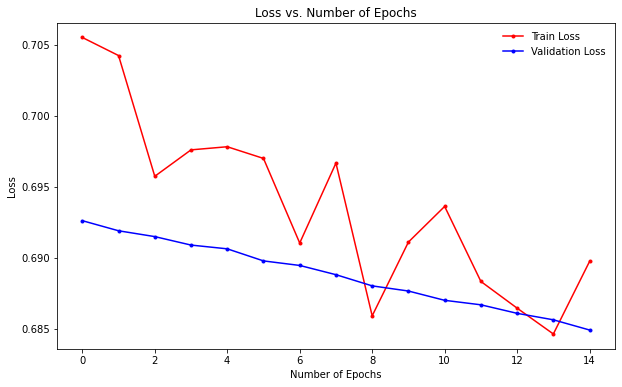

In [61]:
plot_loss(history_3)

### Deeper CNN with Adam Optimiser

We again create the same deeper CNN model but this time train it using the Adam optimiser:

In [62]:
model_4 = Sequential(name='model_4')

model_4.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_4.add(Activation('relu'))
model_4.add(Conv2D(32, (3, 3)))
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

model_4.add(Conv2D(64, (3, 3), padding='same'))
model_4.add(Activation('relu'))
model_4.add(Conv2D(64, (3, 3)))
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

model_4.add(Flatten())
model_4.add(Dense(512))
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(2))
model_4.add(Activation('softmax'))


In [63]:
from tensorflow.keras.optimizers import Adam

opt_4 = Adam(learning_rate = 1e-3)
 
model_4.compile(loss='categorical_crossentropy',
                optimizer=opt_4,
                metrics=['accuracy'])

In [64]:
history_4 = model_4.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=15,
                        validation_data=(x_test, y_test),
                        shuffle=True)

Epoch 1/15
25/25 [==============================] - 6s 223ms/step - loss: 0.7645 - accuracy: 0.5075 - val_loss: 0.6884 - val_accuracy: 0.5000
Epoch 2/15
25/25 [==============================] - 5s 218ms/step - loss: 0.6777 - accuracy: 0.5088 - val_loss: 0.6694 - val_accuracy: 0.6500
Epoch 3/15
25/25 [==============================] - 5s 219ms/step - loss: 0.6321 - accuracy: 0.6237 - val_loss: 0.5511 - val_accuracy: 0.7400
Epoch 4/15
25/25 [==============================] - 5s 219ms/step - loss: 0.4998 - accuracy: 0.7525 - val_loss: 0.4212 - val_accuracy: 0.8200
Epoch 5/15
25/25 [==============================] - 6s 223ms/step - loss: 0.4290 - accuracy: 0.8213 - val_loss: 0.4123 - val_accuracy: 0.8400
Epoch 6/15
25/25 [==============================] - 6s 221ms/step - loss: 0.4060 - accuracy: 0.8438 - val_loss: 0.3637 - val_accuracy: 0.8500
Epoch 7/15
25/25 [==============================] - 5s 220ms/step - loss: 0.3662 - accuracy: 0.8375 - val_loss: 0.3514 - val_accuracy: 0.8350
Epoch 

We can see that this model has performed well and has reached a high validation accuracy level while also reaching a low validation loss.

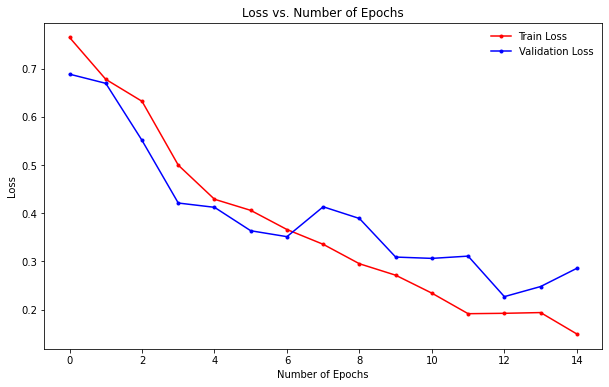

In [65]:
plot_loss(history_4)

## Optimiser Comparison

We will plot a ROC curve to see which of our models has performed the best.


First we create a function that will plot our separate models: 

In [66]:
from sklearn.metrics import roc_curve

def plot_roc(y_test_list, y_pred_list):
    fig , ax = plt.subplots(figsize = (10,10)) 
    ax.plot([0,1],[0,1], 'k--', linewidth = 0.5)
    
    for i, (y_test, y_pred) in enumerate(zip(y_test_list, y_pred_list)):
        fpr, tpr, thr = roc_curve(y_test, y_pred)
        ax.plot(fpr, tpr, linewidth = 0.5, label='model_{}'.format(i+1))
    
    ax.legend(loc='best', facecolor='none', edgecolor='none')
    
    ax.set(xlim = (-0.01, 1.01),
           ylim = (-0.01, 1.01),
           xlabel = 'False Postive Rate',
           ylabel = 'True Postive Rate',
           title = 'ROC Curve for CNN Image Classification')
    

We then calculate the predicted probabilities for either class from each model using our x_test dataset:

In [ ]:
y_pred_1 = model_1.predict(x_test)[:,1]
y_pred_2 = model_2.predict(x_test)[:,1]
y_pred_3 = model_3.predict(x_test)[:,1]
y_pred_4 = model_4.predict(x_test)[:,1]

We then recreate our y_test dataset so that we have it in its pre-encoded form:

In [68]:
y_test = np.ones(200, dtype = float)
y_test[:len(pl_test)] = 0 

In [69]:
y_test_list = [y_test, y_test, y_test, y_test]
y_pred_list = [y_pred_1, y_pred_2, y_pred_3, y_pred_4]

Finally, we use our function to plot the ROC curves for each model:  

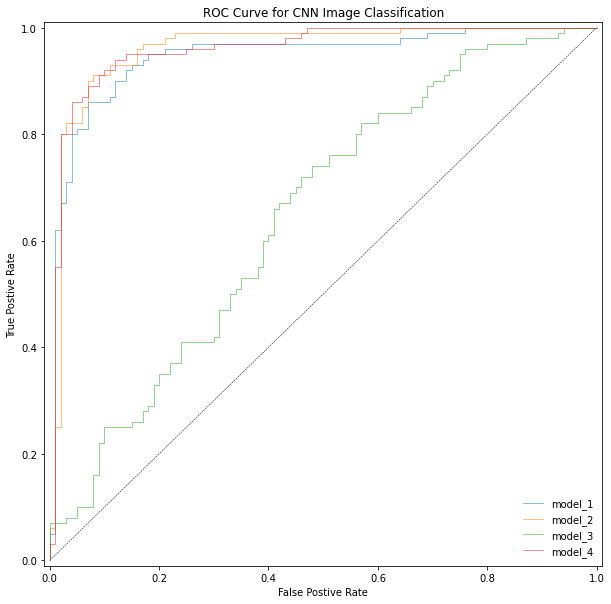

In [70]:
plot_roc(y_test_list, y_pred_list)

We can see that apart from the third model which used the SGD optimiser, there was little difference in the performance of the models. 

To get a better understanding of which model performed the best we can calculate the area under the curve for each model:

In [71]:
from sklearn.metrics import roc_auc_score

for i, (test, pred) in enumerate(zip(y_test_list, y_pred_list)):
    print('model_{} score:'.format(i+1), round(roc_auc_score(test, pred),4))


model_1 score: 0.9464
model_2 score: 0.9609
model_3 score: 0.6495
model_4 score: 0.9597


## Analysis of Results 

We can see from the results above that the deeper, more complicated models with the RMSprop and Adam optimisers performed the best. However, the simpler model with the RMSprop optimiser only had a slightly worse score while having considerably less parameters to train which meant it was also a lot quicker to train. Therefore, we can conclude that model_1 would be best in this scenario. 

## Next Steps 

Given that the simpler model performed well for this task, we could try optimising this further seeing as we only tried out the RMSprop optimiser for this model. We could also try altering hyperparameters such as the learning rate and the decay for this optimiser, as well as trying out different kernel sizes and number of filters when building the model in order to find a model that performs efficiently with a high accuracy. 

We could also increase the training and testing dataset to include more images, and also include images where the trophies are not as clear in the photo so that this model has a higher interoperability.